<a href="https://colab.research.google.com/github/arpan-das-astrophysics/LangChain-Vector-Databases-in-Production-Activeloop/blob/main/Project01_Build_a_News_Articles_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build a News Articles Summarizer**

## **Introduction**
In today's fast-paced world, it's essential to stay updated with the latest news and information. However, going through multiple news articles can be time-consuming. To help us save time and get a quick overview of the important points, let’s develop a News Articles Summarizer application using ChatGPT and LangChain. With this powerful tool, we can scrape online articles, extract their titles and text, and generate concise summaries. Within this lesson, we will walk us through the workflow of constructing a summarizer. We will employ the concepts we discussed in earlier lessons, demonstrating their application in a real-world scenario.

### **Workflow for Building a News Articles Summarizer**
Here’s what we are going to do in this project.

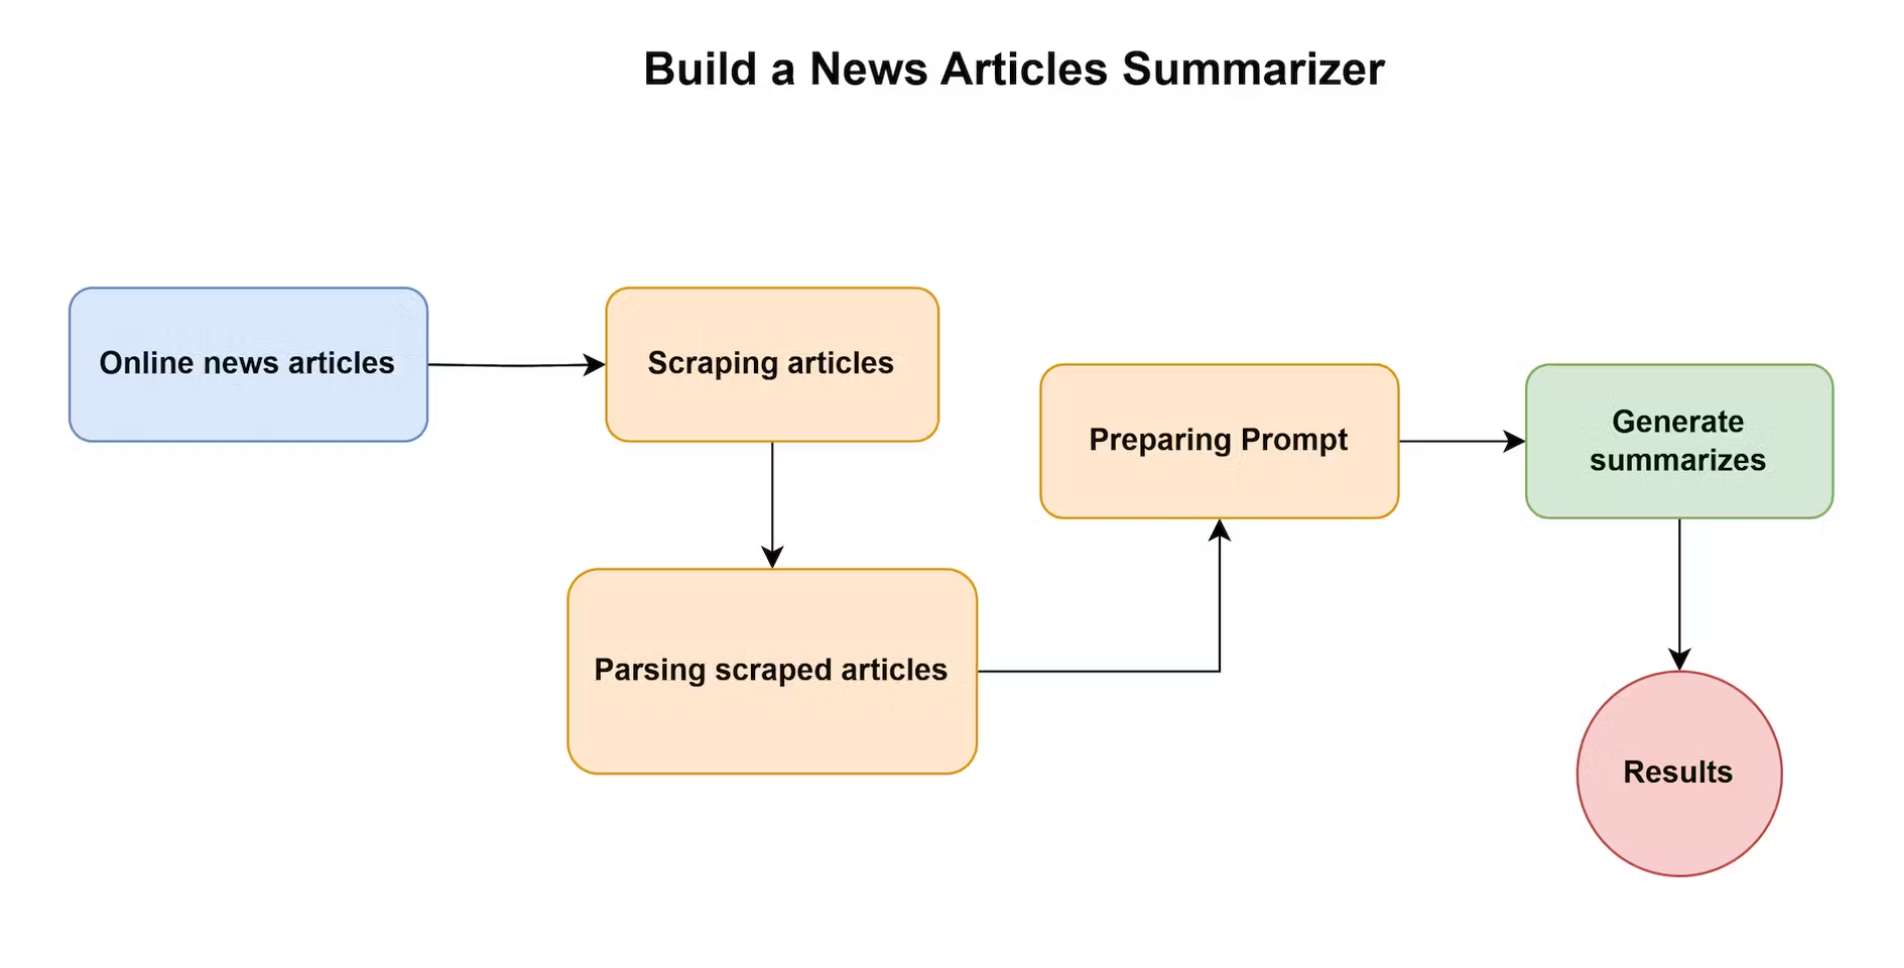

And here are the steps described in more detail:

**Install required libraries:** To get started, ensure we have the necessary libraries installed: requests, newspaper3k, and langchain.

**Scrape articles:** Use the requests library to scrape the content of the target news articles from their respective URLs.

**Extract titles and text:** Employ the newspaper library to parse the scraped HTML and extract the titles and text of the articles.

**Preprocess the text:** Clean and preprocess the extracted texts to make them suitable for input to ChatGPT.

**Generate summaries:** Utilize ChatGPT to summarize the extracted articles' text concisely.

**Output the results: **Present the summaries along with the original titles, allowing users to grasp the main points of each article quickly.
B
y following this workflow, we can create an efficient News Articles Summarizer that leverages ChatGPT to provide valuable insights in a time-saving manner. Stay informed without spending hours reading through lengthy articles, and enjoy the benefits of AI-powered summarization.

In [1]:
!pip install -q langchain==0.0.208 openai python-dotenv newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from getpass import getpass
import os
os.environ["OPENAI_API_KEY"] = getpass()

··········


We picked the URL of a news article to generate a summary. The following code fetches articles from a list of URLs using the requests library with a custom User-Agent header. It then extracts the title and text of each article using the newspaper library.

In [3]:
import requests
from newspaper import Article

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

article_urls = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"

session = requests.Session()

try:
    response = session.get(article_urls, headers=headers, timeout=10)

    if response.status_code == 200:
        article = Article(article_urls)
        article.download()
        article.parse()

        print(f"Title: {article.title}")
        print(f"Text: {article.text}")

    else:
        print(f"Failed to fetch article at {article_urls}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_urls}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan is a senior editor at TechForge Media with over a decade of experience covering the latest technology and interviewing leading industry figures. He can often be sighted at tech conferences with a strong coffee in one hand and a laptop in the other. If it's geeky, he’s probably into it. Find him on Twitter (@Gadget_Ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and the aim is for it to be capable of training models with trillions of parameters.

“We hope RSC will help us build entire

The next code imports essential classes and functions from the LangChain and sets up a ChatOpenAI instance with a temperature of 0 for controlled response generation. Additionally, it imports chat-related message schema classes, which enable the smooth handling of chat-based tasks. The following code will start by setting the prompt and filling it with the article’s content.

In [4]:
from langchain.schema import (
    HumanMessage
)

# we get the article data from the scraping part
article_title = article.title
article_text = article.text

# prepare template for prompt
template = """You are a very good assistant that summarizes online articles.

Here's the article you want to summarize.

==================
Title: {article_title}

{article_text}
==================

Write a summary of the previous article.
"""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

The HumanMessage is a structured data format representing user messages within the chat-based interaction framework. The ChatOpenAI class is utilized to interact with the AI model, while the HumanMessage schema provides a standardized representation of user messages. The template consists of placeholders for the article's title and content, which will be substituted with the actual article_title and article_text. This process simplifies and streamlines the creation of dynamic prompts by allowing us to define a template with placeholders and then replace them with actual data when needed.

In [5]:
from langchain.chat_models import ChatOpenAI

# load the model
chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

As we loaded the model and set the temperature to 0. We’d use the chat() instance to generate a summary by passing a single HumanMessage object containing the formatted prompt. The AI model processes this prompt and returns a concise summary:

In [6]:
# generate summary
summary = chat(messages)
print(summary.content)

Meta, formerly known as Facebook, has introduced its AI Research SuperCluster (RSC), an AI supercomputer that is expected to be the fastest in the world once completed in mid-2022. The RSC will be capable of training models with trillions of parameters and aims to enable the development of AI systems for real-time voice translations and collaborative experiences in the metaverse. Meta anticipates that the RSC will be 20 times faster than its current clusters, significantly improving training times for large-scale NLP workflows. The supercomputer was designed with security and privacy controls to allow Meta to use real-world examples from its production systems for research purposes.


If we want a bulleted list, we can modify a prompt and get the result.

In [7]:
# prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format.
"""

# format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

# generate summary
summary = chat([HumanMessage(content=prompt)])
print(summary.content)

- Meta (formerly Facebook) has unveiled an AI supercomputer called the AI Research SuperCluster (RSC) that it claims will be the world's fastest.
- The RSC is currently being used for training large natural language processing (NLP) and computer vision models.
- Once fully built in mid-2022, Meta aims for the RSC to be capable of training models with trillions of parameters and to be the fastest in the world.
- Meta hopes that the RSC will enable the development of new AI systems for real-time voice translations, collaboration, and AR gaming in the metaverse.
- The RSC is expected to be 20x faster than Meta's current clusters, 9x faster at running the NVIDIA Collective Communication Library (NCCL), and 3x faster at training large-scale NLP workflows.
- With the RSC, Meta can train models with tens of billions of parameters in three weeks compared to nine weeks previously.
- The RSC was designed with security and privacy controls to allow Meta to use real-world examples from its product

If we want to get the summary in French, we can instruct the model to generate the summary in French language. However, please note that GPT-4's main training language is English and while it has a multilingual capability, the quality may vary for languages other than English. Here's how we can modify the prompt.



In [8]:
# prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists in French.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format, in French.
"""

# format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

# generate summary
summary = chat([HumanMessage(content=prompt)])
print(summary.content)

- Meta a dévoilé un superordinateur d'intelligence artificielle (IA) appelé AI Research SuperCluster (RSC) qui prétend être le plus rapide au monde.
- Le RSC est encore en construction, mais les chercheurs de Meta l'utilisent déjà pour former de grands modèles de traitement du langage naturel (NLP) et de vision par ordinateur.
- Une fois terminé, le RSC devrait être le plus rapide au monde et capable de former des modèles avec des milliards de paramètres.
- Meta espère que le RSC permettra de développer de nouveaux systèmes d'IA pour des applications telles que la traduction vocale en temps réel ou les jeux en réalité augmentée.
- Le RSC devrait être 20 fois plus rapide que les clusters actuels de Meta et 9 fois plus rapide pour exécuter la bibliothèque de communication collective NVIDIA (NCCL).
- Meta affirme que le RSC permettra de former des modèles avec des dizaines de milliards de paramètres en trois semaines au lieu de neuf semaines.
- Le RSC a été conçu avec des contrôles de séc

The solution we've presented here is powerful because it leverages the capabilities of LangChain and GPT-4, a state-of-the-art language model developed by OpenAI, to understand and generate human-like text based on natural language instructions. This allows us to interact with the model as we would with a human, asking it to perform complex tasks, like summarizing an article in a bulleted list format in French, with ease and precision.

The process under the hood of this code is quite fascinating. First, we obtain the article data, including the title and text. We then prepare a template for the prompt we want to give to the AI model. This prompt is designed to simulate a conversation with the model, telling it that it's an "advanced AI assistant" and giving it a specific task - to summarize the article into a bulleted list in French.

Once the template is ready, we load the GPT-4 model using ChatOpenAI class with a certain temperature setting, which influences the randomness of the model's outputs. We then format the prompt using the article data.

The core part of the process is when we pass the formatted prompt to the model. The model parses the prompt, understands the task, and generates a summary accordingly. It uses its vast knowledge, trained on diverse internet text, to comprehend and summarize the article in French.

Lastly, the generated summary, which is a response from the model, is printed. The summary is expected to be a concise, bullet-point version of the article in French, just as we instructed the model in the prompt.

In essence, we are guiding the model using natural language instructions to generate the desired output. This interaction is akin to how we might ask a human assistant to perform a task, making it a powerful and intuitive solution for a variety of applications.

## **Conclusion**
In conclusion, we've illustrated the process of creating a robust News Articles Summarizer utilizing the capabilities of ChatGPT and LangChain. This potent tool simplifies the task of staying informed by extracting and condensing vital information from a myriad of articles into accessible, AI-generated summaries. The process has been further enriched by converting these summaries into bulleted lists, enhancing readability and comprehension.

In response to the requirements of a multilingual audience, we've also expanded the scope of our summarizer to provide summaries in different languages, French being our exemplary case. This showcases the potential of our tool to cater to a diverse, global audience.

The crux of this article is the workflow we've outlined - a step-by-step guide that empowers us to construct our own summarizer. With this, we can streamline our information consumption process, save considerable time, and stay abreast with the latest news and developments.

We've also delved into the intricacies of prompt construction. A well-crafted prompt ensures that the model understands the task, which in our case, involved summarizing an article into a bulleted list and in a different language. By comprehending the nuances of prompt design, we can further tweak the model to generate outputs that suit our unique needs.